<a href="https://colab.research.google.com/github/Malcuthrad/Challenge-Alura-Store/blob/main/AluraStoreLatam_Antonio_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import numpy as np
import urllib.error
from IPython.display import display

In [109]:
# Muestra valores en formato monetario
def format_currency(amount):
    return '${:,.2f}'.format(amount)
#Suma de ventas
total_facturacion_tienda_1 = sum(tienda["Precio"])
total_facturacion_tienda_2 = sum(tienda2["Precio"])
total_facturacion_tienda_3 = sum(tienda3["Precio"])
total_facturacion_tienda_4 = sum(tienda4["Precio"])

#Imprime resultados por tienda
print(f'Facturación Total Tienda 1: {format_currency(total_facturacion_tienda_1)}')
print(f'Facturación Total Tienda 2: {format_currency(total_facturacion_tienda_2)}')
print(f'Facturación Total Tienda 3: {format_currency(total_facturacion_tienda_3)}')
print(f'Facturación Total Tienda 4: {format_currency(total_facturacion_tienda_4)}')


Facturación Total Tienda 1: $1,150,880,400.00
Facturación Total Tienda 2: $1,116,343,500.00
Facturación Total Tienda 3: $1,098,019,600.00
Facturación Total Tienda 4: $1,038,375,700.00


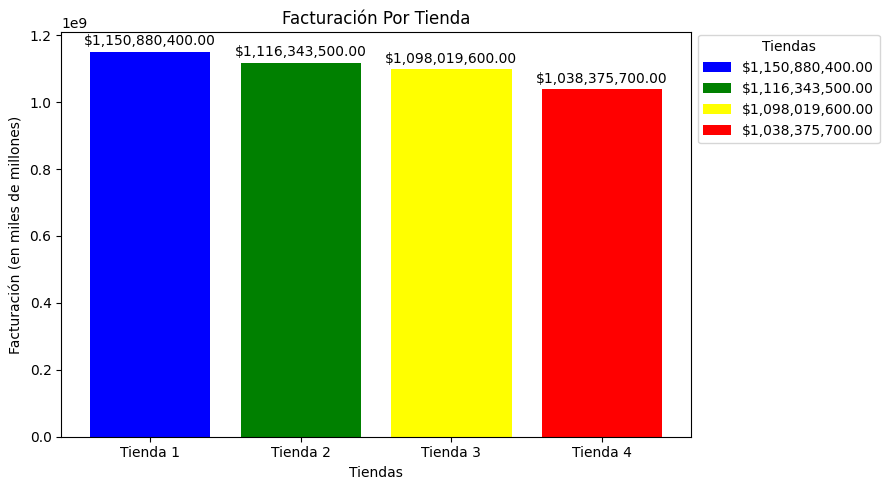

In [178]:
# Mostrar resultados en gráfico de barras

# Nombres de las tiendas y datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [total_facturacion_tienda_1, total_facturacion_tienda_2, total_facturacion_tienda_3, total_facturacion_tienda_4]

# Crear gráfico de barras
plt.figure(figsize=(9, 5))
numeros_etiquetas = [f"${i:,.2f}" for i in facturacion]
plt.bar(tiendas, facturacion, label=numeros_etiquetas, color=['blue', 'green', 'yellow', 'red'])

# Agregar título y etiquetas
plt.title('Facturación Por Tienda')
plt.ylabel('Facturación (en miles de millones)')
plt.xlabel('Tiendas')
plt.legend(title='Tiendas', loc='center left', bbox_to_anchor=(1, 0.86))
# Agregar los valores sobre cada barra
for i, valor in enumerate(facturacion):
    plt.text(i, valor + 20000000, f"${valor:,.2f}", ha='center', fontsize=10)


plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [44]:
Las_tiendas = [(tienda, 'Tienda 1'), (tienda2, 'Tienda 2'), (tienda3, 'Tienda 3'), (tienda4, 'Tienda 4')]

for t in Las_tiendas:
    print(f'\n{t[1]} - Ventas por Categoría:\n')

# count para cantidad de ventas, sum para total vendido
    ventas_por_categoria = (t[0].groupby(['Categoría del Producto']).agg({'Precio': ['count', 'sum']}).reset_index())

    # Renombrar columnas para claridad
    ventas_por_categoria.columns = ['Categoría Producto', 'Número de Ventas', 'Dinero Recaudado']

    # Ordenar por total vendido, si quieres
    ventas_por_categoria = ventas_por_categoria.sort_values(by='Dinero Recaudado', ascending=False)

#Mostrar resultados
    display(ventas_por_categoria.style.set_properties(**{'text-align': 'left'}).format({'Dinero Recaudado': '${:,.2f}'}))




Tienda 1 - Ventas por Categoría:



,Categoría Producto,Número de Ventas,Dinero Recaudado
3,Electrónicos,448,"$429,493,500.00"
2,Electrodomésticos,312,"$363,685,200.00"
7,Muebles,465,"$187,633,700.00"
4,Instrumentos musicales,182,"$91,299,000.00"
1,Deportes y diversión,284,"$39,290,000.00"
5,Juguetes,324,"$17,995,700.00"
0,Artículos para el hogar,171,"$12,698,400.00"
6,Libros,173,"$8,784,900.00"



Tienda 2 - Ventas por Categoría:



,Categoría Producto,Número de Ventas,Dinero Recaudado
3,Electrónicos,422,"$410,831,100.00"
2,Electrodomésticos,305,"$348,567,800.00"
7,Muebles,442,"$176,426,300.00"
4,Instrumentos musicales,224,"$104,990,300.00"
1,Deportes y diversión,275,"$34,744,500.00"
5,Juguetes,313,"$15,945,400.00"
0,Artículos para el hogar,181,"$14,746,900.00"
6,Libros,197,"$10,091,200.00"



Tienda 3 - Ventas por Categoría:



,Categoría Producto,Número de Ventas,Dinero Recaudado
3,Electrónicos,451,"$410,775,800.00"
2,Electrodomésticos,278,"$329,237,900.00"
7,Muebles,499,"$201,072,100.00"
4,Instrumentos musicales,177,"$77,380,900.00"
1,Deportes y diversión,277,"$35,593,100.00"
5,Juguetes,315,"$19,401,100.00"
0,Artículos para el hogar,177,"$15,060,000.00"
6,Libros,185,"$9,498,700.00"



Tienda 4 - Ventas por Categoría:



,Categoría Producto,Número de Ventas,Dinero Recaudado
3,Electrónicos,451,"$409,476,100.00"
2,Electrodomésticos,254,"$283,260,200.00"
7,Muebles,480,"$192,528,900.00"
4,Instrumentos musicales,170,"$75,102,400.00"
1,Deportes y diversión,277,"$33,350,100.00"
5,Juguetes,338,"$20,262,200.00"
0,Artículos para el hogar,201,"$15,074,500.00"
6,Libros,187,"$9,321,300.00"


# 3. Calificación promedio de la tienda


In [128]:
promedio_tienda1 = round(tienda["Calificación"].mean(),2)
promedio_tienda2 = round(tienda2["Calificación"].mean(),2)
promedio_tienda3 = round(tienda3["Calificación"].mean(),2)
promedio_tienda4 = round(tienda4["Calificación"].mean(),2)

print(f'La calificacion promedio de la tienda 1 es: {promedio_tienda1:,.2f}')
print(f'La calificacion promedio de la tienda 2 es: {promedio_tienda2:,.2f}')
print(f'La calificacion promedio de la tienda 3 es: {promedio_tienda3:,.2f}')
print(f'La calificacion promedio de la tienda 4 es: {promedio_tienda4:,.2f}')

La calificacion promedio de la tienda 1 es: 3.98
La calificacion promedio de la tienda 2 es: 4.04
La calificacion promedio de la tienda 3 es: 4.05
La calificacion promedio de la tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [182]:
# Suponiendo que tu DataFrame se llama 'tienda'
producto_ventas = (
    tienda.groupby('Producto')
          .size()
          .reset_index(name='Cantidad de Ventas')
          .sort_values(by='Cantidad de Ventas', ascending=False)
)

producto_mas_vendido = producto_ventas.iloc[0]
producto_menos_vendido = producto_ventas.iloc[-1]

print(f"📈 Producto más vendido: {producto_mas_vendido['Producto']} ({producto_mas_vendido['Cantidad de Ventas']} ventas)")
print(f"📉 Producto menos vendido: {producto_menos_vendido['Producto']} ({producto_menos_vendido['Cantidad de Ventas']} ventas)")


📈 Producto más vendido: Armario (60 ventas)
📉 Producto menos vendido: Auriculares con micrófono (33 ventas)


In [192]:
for df, nombre_tienda in Las_tiendas:
    print(f"\n🛒 {nombre_tienda} - Productos más y menos vendidos:\n")

    # Agrupar productos por nombre y contar cantidad de ventas
    producto_ventas = (
        df.groupby('Producto')
          .size()
          .reset_index(name='Cantidad de Ventas')
          .sort_values(by='Cantidad de Ventas', ascending=False)
    )

    # Identificar los 5 productos mas y menos vendidos
    mas_vendidos = producto_ventas.head(5)
    menos_vendidos = producto_ventas.tail(5)

    # Mostrar productos más vendidos
    print("📈 Más vendido(s):")
    display(mas_vendidos.style.set_properties(**{'text-align': 'left'}))

    # Mostrar productos menos vendidos
    print("\n📉 Menos vendido(s):")
    display(menos_vendidos.style.set_properties(**{'text-align': 'left'}))



🛒 Tienda 1 - Productos más y menos vendidos:

📈 Más vendido(s):


,Producto,Cantidad de Ventas
1,Armario,60
48,TV LED UHD 4K,60
33,Microondas,60
40,Secadora de ropa,58
32,Mesa de noche,56



📉 Menos vendido(s):


,Producto,Cantidad de Ventas
34,Mochila,39
38,Pandereta,36
37,Olla de presión,35
13,Celular ABXY,33
4,Auriculares con micrófono,33



🛒 Tienda 2 - Productos más y menos vendidos:

📈 Más vendido(s):


,Producto,Cantidad de Ventas
24,Iniciando en programación,65
33,Microondas,62
7,Batería,61
38,Pandereta,58
21,Guitarra acústica,58



📉 Menos vendido(s):


,Producto,Cantidad de Ventas
3,Auriculares,37
44,Sillón,35
23,Impresora,34
31,Mesa de comedor,34
26,Juego de mesa,32



🛒 Tienda 3 - Productos más y menos vendidos:

📈 Más vendido(s):


,Producto,Cantidad de Ventas
27,Kit de bancas,57
31,Mesa de comedor,56
11,Cama king,56
41,Set de ollas,55
32,Mesa de noche,55



📉 Menos vendido(s):


,Producto,Cantidad de Ventas
22,Guitarra eléctrica,38
34,Mochila,36
33,Microondas,36
42,Set de vasos,36
9,Bloques de construcción,35



🛒 Tienda 4 - Productos más y menos vendidos:

📈 Más vendido(s):


,Producto,Cantidad de Ventas
10,Cama box,62
15,Cubertería,59
11,Cama king,56
18,Dashboards con Power BI,56
12,Carrito de control remoto,55



📉 Menos vendido(s):


,Producto,Cantidad de Ventas
14,Ciencia de datos con Python,38
39,Refrigerador,38
21,Guitarra acústica,37
1,Armario,34
22,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [195]:
promedio_costo_envio_tienda1 = round(tienda['Costo de envío'].mean(),2)
print(f'El promedio del costo de envio de la tienda 1 es: {format_currency(promedio_costo_envio_tienda1)}')





El promedio del costo de envio de la tienda 1 es: $26,018.61
